<a href="https://colab.research.google.com/github/Nido89/RegressionInTenserflow3.0/blob/master/FinalLinearRegression_AIMLwithTenserflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
df1 = pd.read_json("https://meri.digitraffic.fi/api/v1/metadata/vessels")
df1.head()

,timestamp,destination,mmsi,callSign,imo,shipType,draught,eta,posType,referencePointA,referencePointB,referencePointC,referencePointD,name
0,2019-10-27 11:30:06.994,"S,PETERBUG",273383250,UEWW,9751913,80,30,711936,15,119,22,8,9,BALT FLOT 4
1,2019-08-28 05:18:20.325,ROOMASSAARE ABRUKA,276808000,ESKA,0,60,0,1596,1,5,10,2,2,ABRO
2,2018-10-17 22:10:27.596,SPB,273274000,UBCE,0,90,36,691456,15,103,23,6,10,VOLGONEFT-102
3,2019-10-29 18:10:47.374,RONNSKAR VIA NOK,236644000,ZDNW2,9166467,70,62,719168,1,97,11,8,7,SYLVIA
4,2018-10-10 18:19:37.007,ICDAS TURKEY,259794000,LALC7,9490856,70,91,707328,1,160,30,20,12,SPAR URSA


In [0]:
import pandas as pd
url='https://cdn.fmi.fi/fmiodata-convert-api/output/csv-5e15aa66-504b-46db-9145-1992017e8753.csv'
df2 = pd.read_csv(url) 
df2.head(10)

,Year,m,d,Time,Time zone,Horizontal visibility (m),Wind speed (m/s)
0,2019,10,28,00:00,UTC,21970,0.0
1,2019,10,28,01:00,UTC,21230,0.0
2,2019,10,28,02:00,UTC,30740,0.0
3,2019,10,28,03:00,UTC,10980,0.0
4,2019,10,28,04:00,UTC,5000,0.0
5,2019,10,28,05:00,UTC,8140,2.1
6,2019,10,28,06:00,UTC,9490,1.8
7,2019,10,28,07:00,UTC,14530,0.0
8,2019,10,28,08:00,UTC,7990,0.9
9,2019,10,28,09:00,UTC,21530,0.0


In [0]:
df3=df_index = pd.merge(df1, df2, right_index=True, left_index=True)

df3.head(7)


,timestamp,destination,mmsi,callSign,imo,shipType,draught,eta,posType,referencePointA,referencePointB,referencePointC,referencePointD,name,Year,m,d,Time,Time zone,Horizontal visibility (m),Wind speed (m/s)
0,2019-10-27 11:30:06.994,"S,PETERBUG",273383250,UEWW,9751913,80,30,711936,15,119,22,8,9,BALT FLOT 4,2019,10,28,00:00,UTC,21970,0.0
1,2019-08-28 05:18:20.325,ROOMASSAARE ABRUKA,276808000,ESKA,0,60,0,1596,1,5,10,2,2,ABRO,2019,10,28,01:00,UTC,21230,0.0
2,2018-10-17 22:10:27.596,SPB,273274000,UBCE,0,90,36,691456,15,103,23,6,10,VOLGONEFT-102,2019,10,28,02:00,UTC,30740,0.0
3,2019-10-29 18:10:47.374,RONNSKAR VIA NOK,236644000,ZDNW2,9166467,70,62,719168,1,97,11,8,7,SYLVIA,2019,10,28,03:00,UTC,10980,0.0
4,2018-10-10 18:19:37.007,ICDAS TURKEY,259794000,LALC7,9490856,70,91,707328,1,160,30,20,12,SPAR URSA,2019,10,28,04:00,UTC,5000,0.0
5,2019-09-17 23:39:06.515,STETTIN,304559000,V2OK3,8205187,70,23,630144,1,60,14,3,9,LISA D,2019,10,28,05:00,UTC,8140,2.1
6,2019-09-12 14:24:30.748,US NYC,538004992,V7AG7,9661235,80,114,650432,1,149,34,20,12,MARJORIE K,2019,10,28,06:00,UTC,9490,1.8


In [0]:
df4 = df3["eta"]
  
df4.head(10)

0    711936
1      1596
2    691456
3    719168
4    707328
5    630144
6    650432
7    803584
8      1596
9    678208
Name: eta, dtype: int64

In [0]:
df5 = df2["Horizontal visibility (m)"]
df5.head(10)

0    21970
1    21230
2    30740
3    10980
4     5000
5     8140
6     9490
7    14530
8     7990
9    21530
Name: Horizontal visibility (m), dtype: int64

In [0]:
df6= df2["Wind speed (m/s)"]
df6.head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    2.1
6    1.8
7    0.0
8    0.9
9    0.0
Name: Wind speed (m/s), dtype: float64

In [0]:
#Horizontal Visibility plus eta
df7= pd.merge(df4, df5, right_index=True, left_index=True)
df7.head(7)


,eta,Horizontal visibility (m)
0,711936,21970
1,1596,21230
2,691456,30740
3,719168,10980
4,707328,5000
5,630144,8140
6,650432,9490


In [0]:
#eta plus WindSpeed
df8= pd.merge(df4, df6, right_index=True, left_index=True)
df8.tail(7)

,eta,Wind speed (m/s)
18,774144,0.0
19,771456,0.0
20,612736,0.0
21,639488,0.0
22,74994,0.0
23,712705,0.0
24,700800,0.0


In [0]:
#Define your useful columns of data
#column1=df7['eta'].values
#column2=df7['Horizontal visibility (m)'].values

In [0]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 



In [0]:
#np.random.seed(101) 
#tf.set_random_seed(101) 


In [0]:
# Genrating random linear data 
 
x = df7['eta'].values 
y = df7['Horizontal visibility (m)'].values

# Adding noise to the random linear data 
#x += np.random.uniform(-0, df7['eta'].values , 50) 
#y += np.random.uniform(-0,df7['Horizontal visibility (m)'].values, 50) 




In [0]:
n = len(x) # Number of data points 
n

25

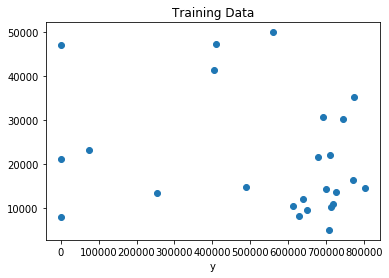

In [0]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel('x') 
plt.xlabel('y') 
plt.title("Training Data") 
plt.show() 


In [0]:
X = tf.placeholder("float") 
Y = tf.placeholder("float") 


In [0]:
W = tf.Variable(np.random.randn(), name = "W") 
b = tf.Variable(np.random.randn(), name = "b") 


In [0]:
learning_rate =0.01
training_epochs = 500


In [0]:
# Hypothesis 
y_pred = tf.add(tf.multiply(X, W), b) 

# Mean Squared Error Cost Function 
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n) 

# Gradient Descent Optimizer 
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Global Variables Initializer 
init = tf.global_variables_initializer() 


In [0]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
	
	# Initializing the Variables 
	sess.run(init) 
	
	# Iterating through all the epochs 
	for epoch in range(training_epochs): 
		
		# Feeding each data point into the optimizer using Feed Dictionary 
		for (_x, _y) in zip(x, y): 
			sess.run(optimizer, feed_dict = {X : _x, Y : _y}) 
		
		# Displaying the result after every 50 epochs 
		if (epoch + 1) % 50 == 0: 
			# Calculating the cost a every epoch 
			c = sess.run(cost, feed_dict = {X : x, Y : y}) 
			print("Epoch", (epoch + 1), ": cost(Loss) =", c, "W =", sess.run(W), "b =", sess.run(b)) 
	
	# Storing necessary values to be used outside the Session 
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
	weight = sess.run(W) 
	bias = sess.run(b) 


Epoch 50 : cost(Loss) = 357067230.0 W = 0.06329858 b = -0.90650666
Epoch 100 : cost(Loss) = 155462220.0 W = 0.029891955 b = -0.8753863
Epoch 150 : cost(Loss) = 155467380.0 W = 0.029972395 b = -0.7502577
Epoch 200 : cost(Loss) = 155487410.0 W = 0.030150184 b = -0.54311055
Epoch 250 : cost(Loss) = 155525230.0 W = 0.030359047 b = -0.25482234
Epoch 300 : cost(Loss) = 155560620.0 W = 0.03050617 b = 0.082817875
Epoch 350 : cost(Loss) = 155577020.0 W = 0.030568732 b = 0.4400001
Epoch 400 : cost(Loss) = 155581300.0 W = 0.030588467 b = 0.8032492
Epoch 450 : cost(Loss) = 155581220.0 W = 0.03059377 b = 1.1682059
Epoch 500 : cost(Loss) = 155579820.0 W = 0.030594852 b = 1.5336323


In [0]:
# Calculating the predictions 
predictions = weight * x + bias 
print("Training cost(Loss in Accuracy) =", training_cost, "Weight =", weight, "bias =", bias, '\n') 


Training cost(Loss in Accuracy) = 155579820.0 Weight = 0.030594852 bias = 1.5336323 



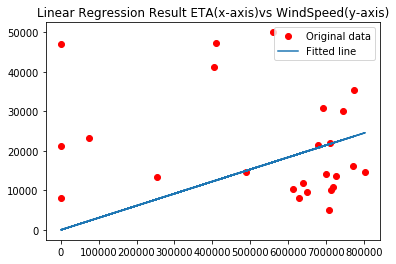

In [0]:
# Plotting the Results 
plt.plot(x, y, 'ro', label ='Original data') 
plt.plot(x, predictions, label ='Fitted line') 
plt.title('Linear Regression Result ETA(x-axis)vs WindSpeed(y-axis)') 
plt.legend() 
plt.show() 
